In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,make_scorer,classification_report,roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve
import warnings
warnings.filterwarnings('ignore')
import os

In [48]:
df_train = pd.read_csv("train.csv")
df_train.head()


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:

df_train.shape

(200000, 202)

In [4]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


Observations: We can see from the data that there are 200 input features and one target label, also we can see that "ID_code" column will just act as index number and had no influence on target label

# Checking the balance of dataset & Visulaization

Count of target classes :
 0    179902
1     20098
Name: target, dtype: int64
percentage of count of target classes :
 0    89.951
1    10.049
Name: target, dtype: float64


Text(0, 0.5, 'Index')

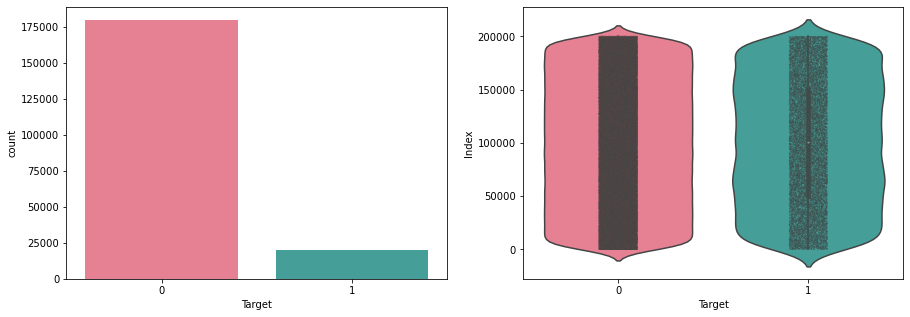

In [5]:

#target classes count
target_class=df_train['target'].value_counts()
print('Count of target classes :\n',target_class)
#Percentage of target classes count
per_target_class=df_train['target'].value_counts()/len(df_train)*100
print('percentage of count of target classes :\n',per_target_class)

#Countplot and violin plot for target classes
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_train.target.values,ax=ax[0],palette='husl')
sns.violinplot(x=df_train.target.values,y=df_train.index.values,ax=ax[1],palette='husl')
sns.stripplot(x=df_train.target.values,y=df_train.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='husl')
ax[0].set_xlabel('Target')
ax[1].set_xlabel('Target')
ax[1].set_ylabel('Index')

Observation: we can clearly see that the data is completely biased towards the target classifier 0 (almost 90% of the target label) and only 10% of the target label is classifier 1. Hence we can conclude that this dataset is completely imbalanced which leads to the overfitting of a model that is not ideal in any situation.

The violin plots drawn above confirms the same thing that dataset is imbalanced, which leads to the prediction of target label as 0 than 1.

# Exploratory Data Analysis(EDA)
## Writing a function to draw plots between input features and target labe

In [6]:
#Distribution of train attributes
def plot_train_attribute_distribution(x,y,X_target,Y_target,train_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(x[attribute],hist=False,label=X_target)
        sns.distplot(y[attribute],hist=False,label=Y_target)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

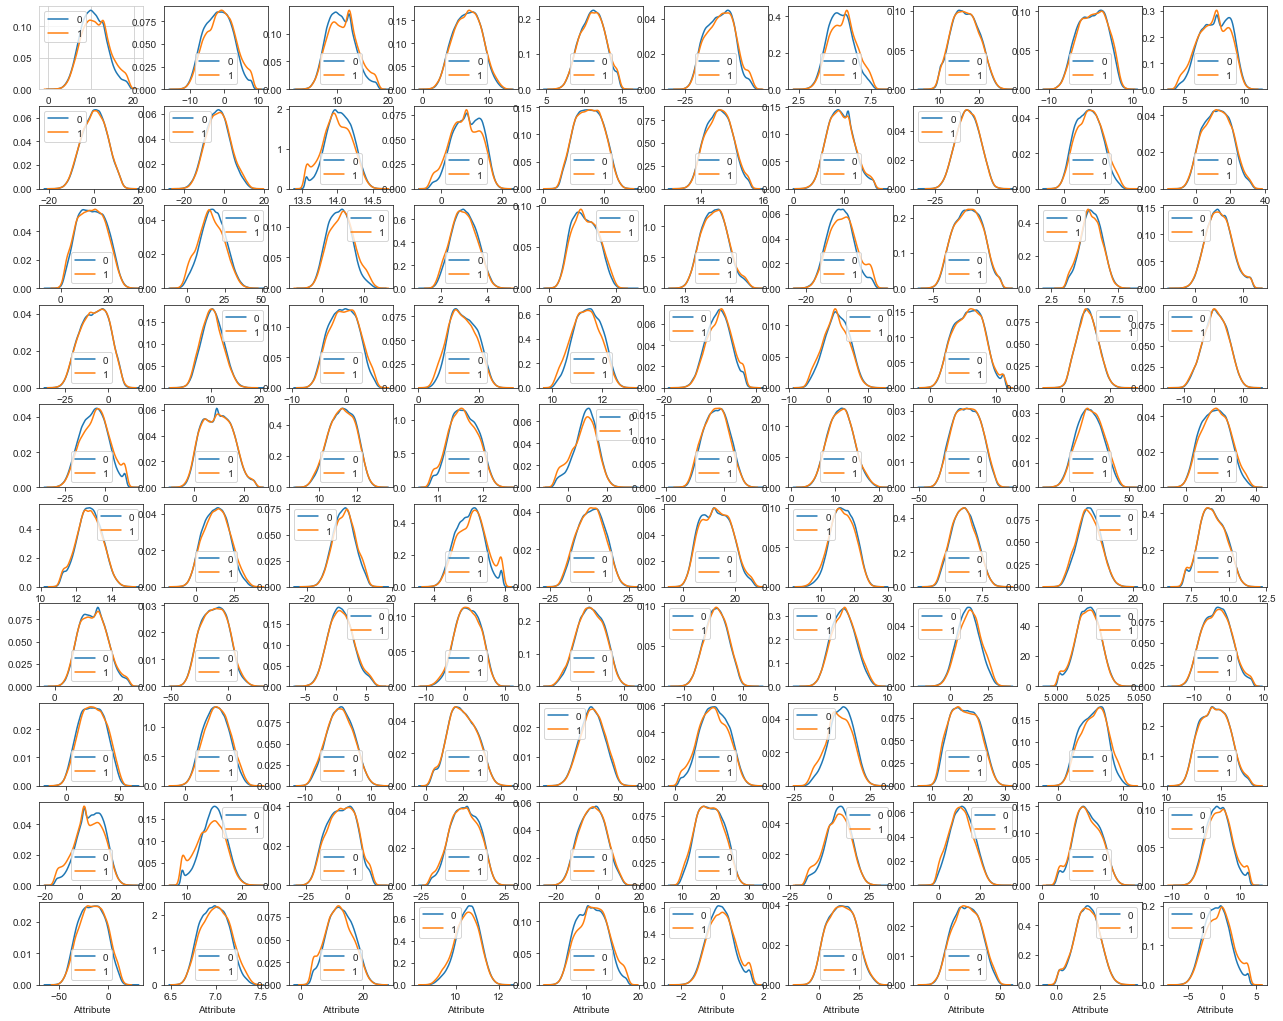

In [7]:
#corresponding to negative class
x=df_train[df_train.target.values==0]
#corresponding to positive class
y=df_train[df_train.target.values==1]
#train attributes from 2 to 202
train_attributes=df_train.columns.values[2:102]
#plot distribution of train attributes
plot_train_attribute_distribution(x,y,'0','1',train_attributes)

<Figure size 432x288 with 0 Axes>

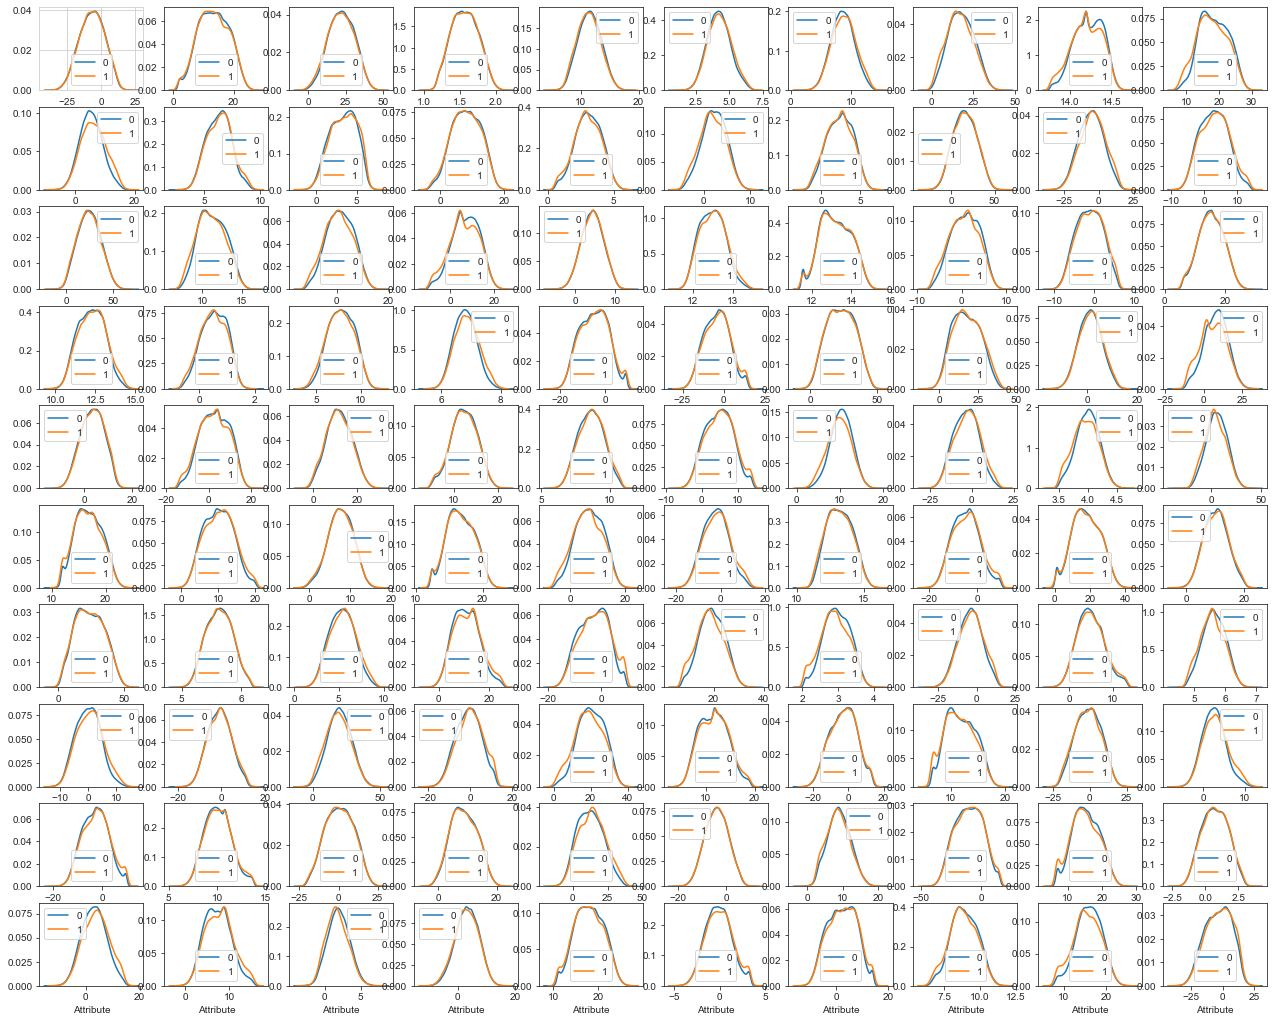

In [8]:
#train attributes from 2 to 102
train_attributes=df_train.columns.values[102:]
#plot distribution of train attributes
plot_train_attribute_distribution(x,y,'0','1',train_attributes)


Observations:

We can only plot 100 graphs at once, hence we plotted the input features against target labels for two times i.e., 100 plots at once. Coming to the conclusion, we can see that there are various distributions among the input features with respect to target labels. Also there are quite some variables which were similar to each other.

we can see that 'var192' and 'var193' have similar distribution, clearly 'var0' and 'var4' have different kind of distributions.

# Importing the test dataset

In [9]:
df_test = pd.read_csv("test.csv")
df_test.head()


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [10]:
df_test.shape
df_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400



Observations: We can see the 200 input features and no target label in test.csv, we have to train a model to predict the target label. Also as given in the train data we had "ID_code" column which don't influence the target label(so it can be ignored)

# Writing a function to plot test attributes distributions:

In [11]:
#Distribution of test attributes
def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(df_test[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

<Figure size 432x288 with 0 Axes>

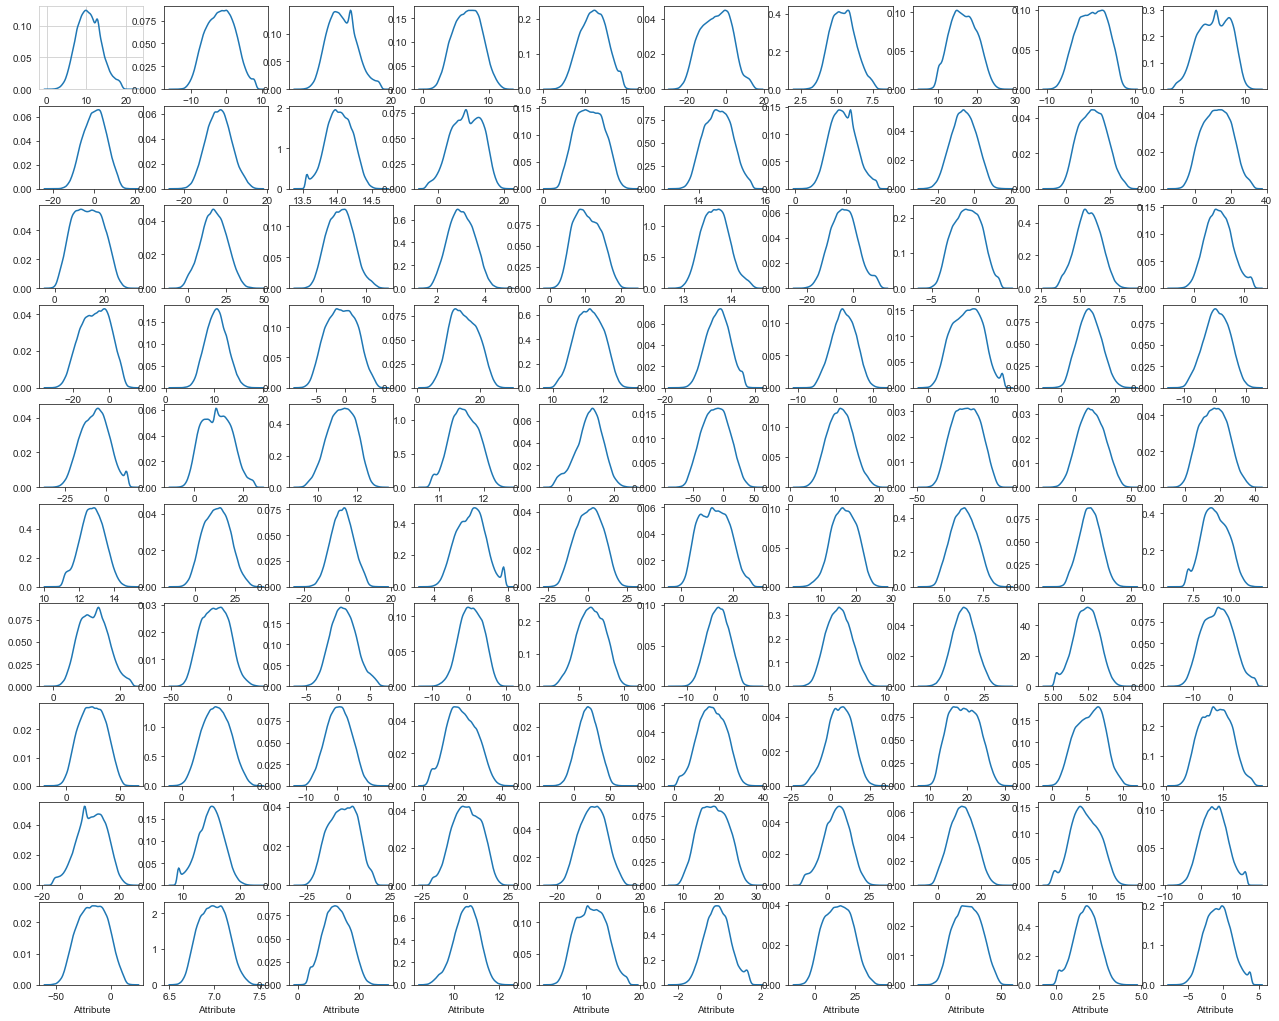

In [12]:
#test attribiutes from 1 to 101
test_attributes=df_test.columns.values[1:101]
#plot distribution of test attributes
plot_test_attribute_distribution(test_attributes)

<Figure size 432x288 with 0 Axes>

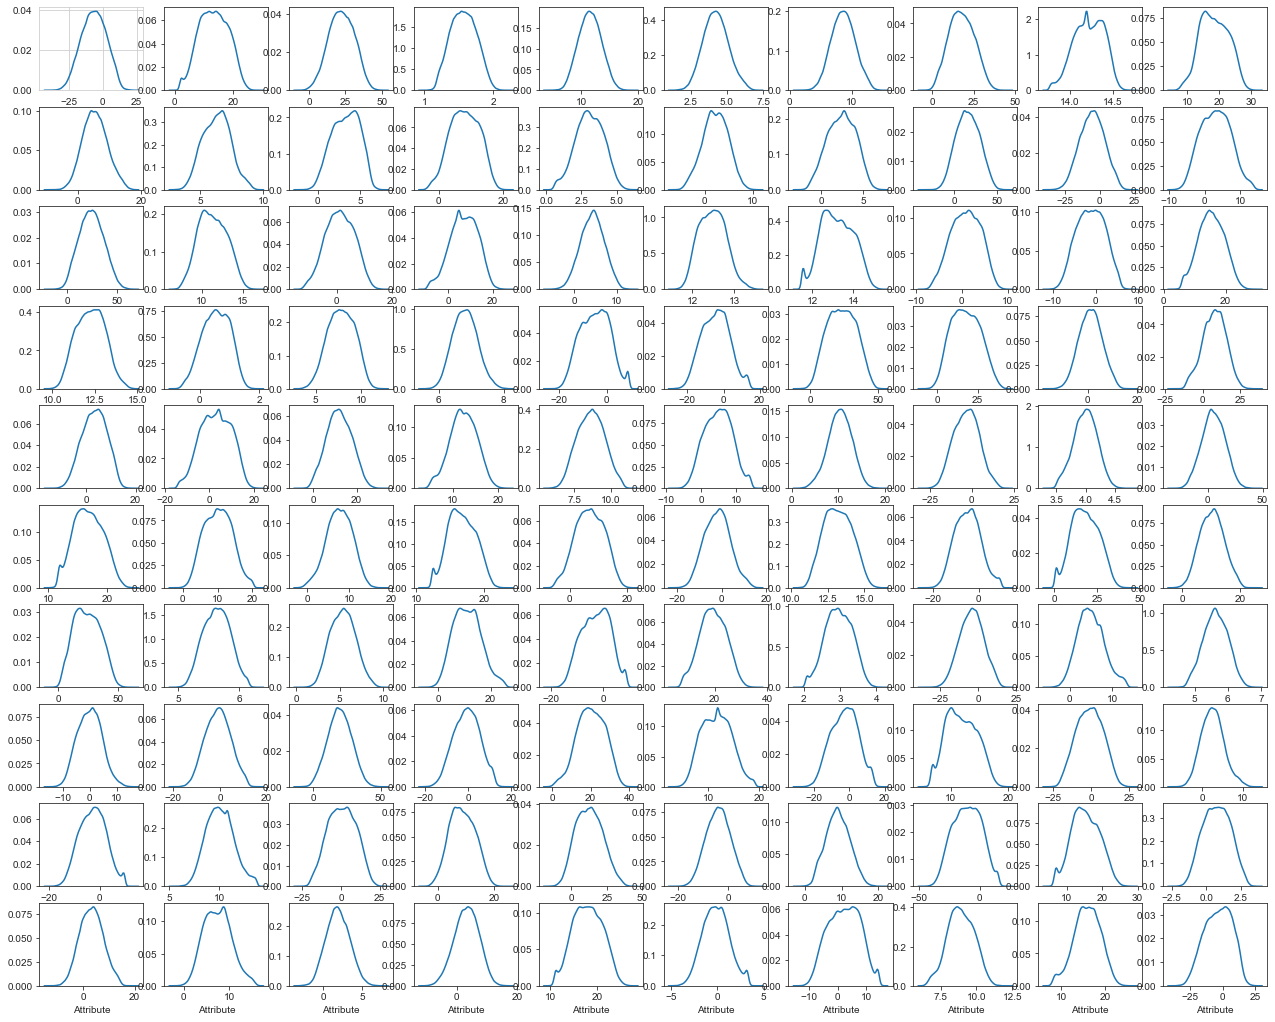

In [13]:
#test attribiutes from 1 to 101
test_attributes=df_test.columns.values[101:]
#plot distribution of test attributes
plot_test_attribute_distribution(test_attributes)

# Visualizations of different distributions

Plotting the mean distributions along the rows and columns against train and test datasets

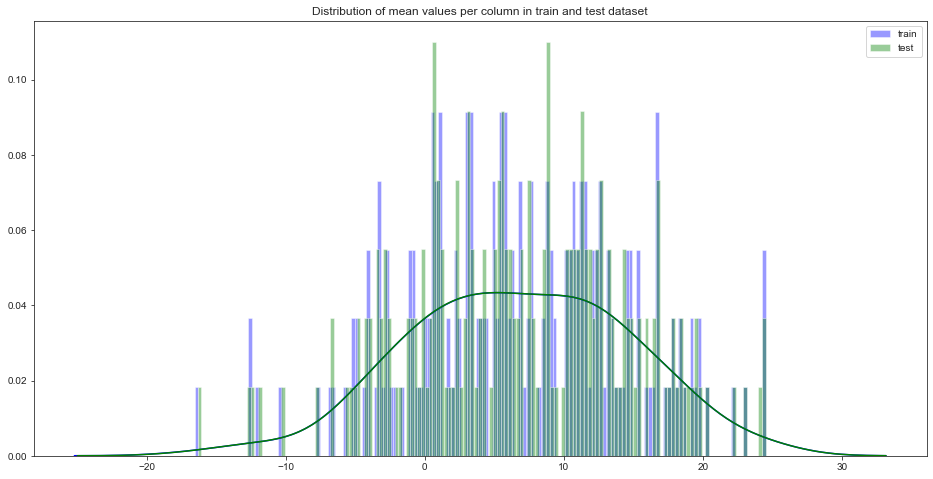

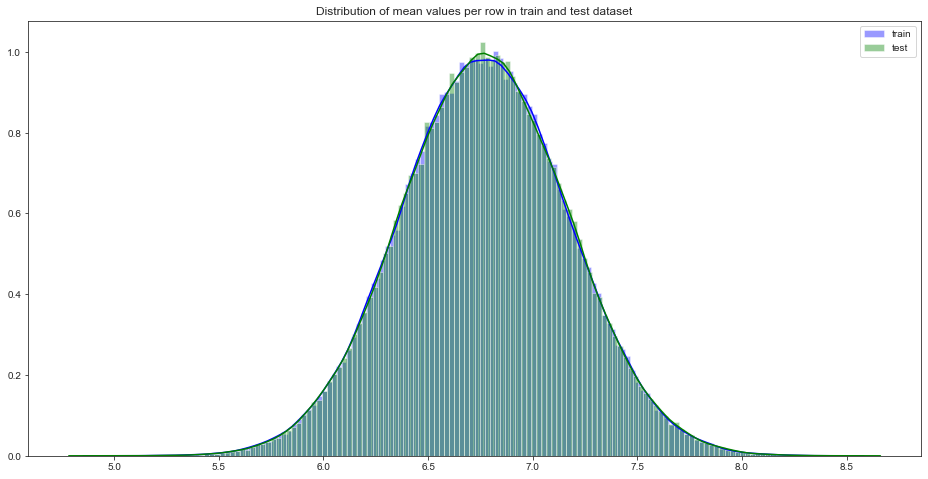

In [14]:
#Distribution of mean values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=df_train.columns.values[2:202]
#test attributes
test_attributes=df_test.columns.values[1:201]
#Distribution plot for mean values per column in train attributes
sns.distplot(df_train[train_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per column in test attributes
sns.distplot(df_test[test_attributes].mean(axis=0),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of mean values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of mean values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for mean values per row in train attributes
sns.distplot(df_train[train_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per row in test attributes
sns.distplot(df_test[test_attributes].mean(axis=1),color='green',kde=True, bins=150, label='test')
plt.title('Distribution of mean values per row in train and test dataset')
plt.legend()
plt.show()


Plotting the standard deviation distribution along the rows and columns against train and test datasets

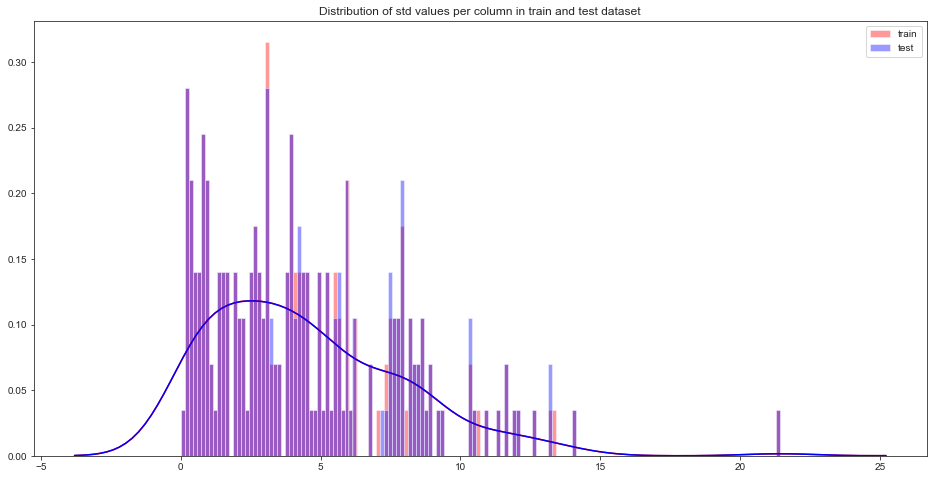

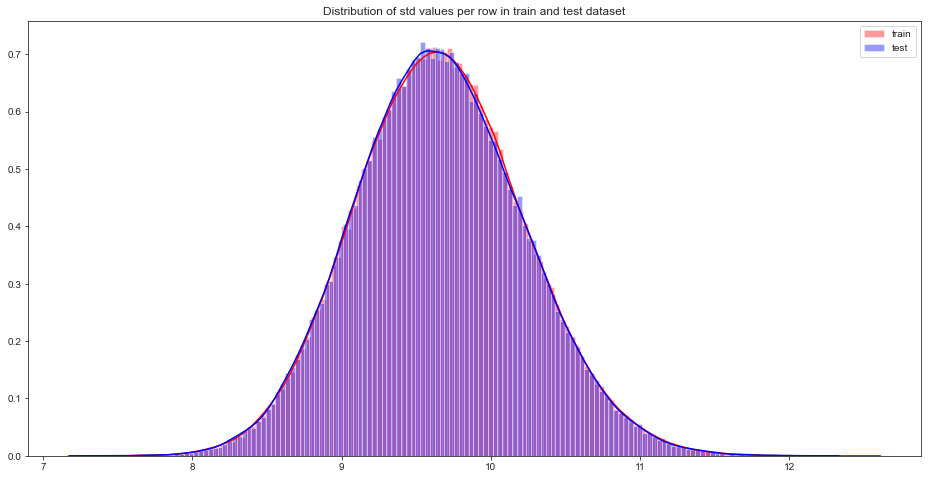

In [15]:
#Distribution of std values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=df_train.columns.values[2:202]
#test attributes
test_attributes=df_test.columns.values[1:201]
#Distribution plot for std values per column in train attributes
sns.distplot(df_train[train_attributes].std(axis=0),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per column in test attributes
sns.distplot(df_test[test_attributes].std(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of std values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of std values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for std values per row in train attributes
sns.distplot(df_train[train_attributes].std(axis=1),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per row in test attributes
sns.distplot(df_test[test_attributes].std(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of std values per row in train and test dataset')
plt.legend()
plt.show()

Plotting the kutosis distribution along the rows and columns against train and test datasets

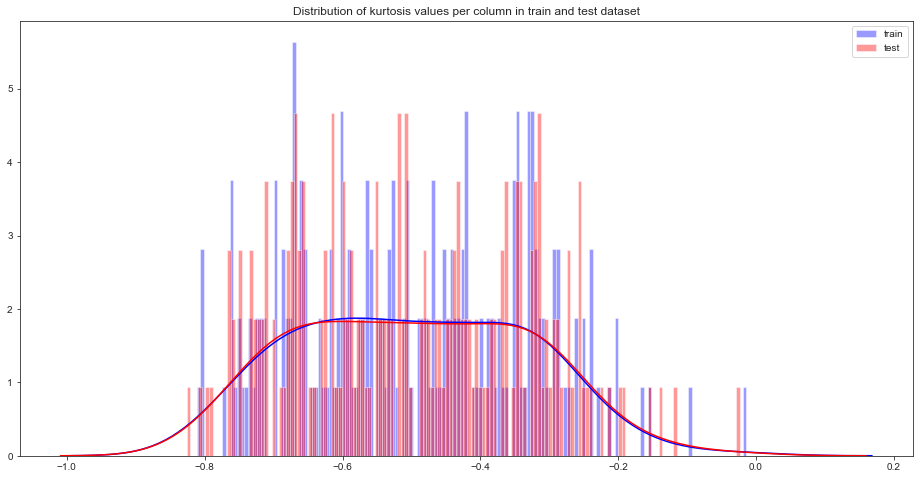

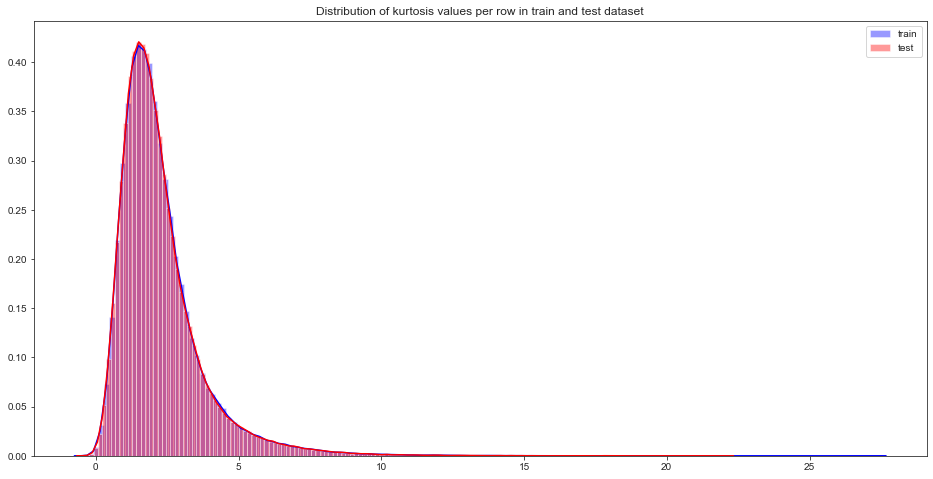

In [16]:
#Distribution of kurtosis values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=df_train.columns.values[2:202]
#test attributes
test_attributes=df_test.columns.values[1:201]
#Distribution plot for kurtosis values per column in train attributes
sns.distplot(df_train[train_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per column in test attributes
sns.distplot(df_test[test_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='test')
plt.title('Distribution of kurtosis values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of kutosis values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for kurtosis values per row in train attributes
sns.distplot(df_train[train_attributes].kurtosis(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per row in test attributes
sns.distplot(df_test[test_attributes].kurtosis(axis=1),color='red',kde=True, bins=150, label='test')
plt.title('Distribution of kurtosis values per row in train and test dataset')
plt.legend()
plt.show()

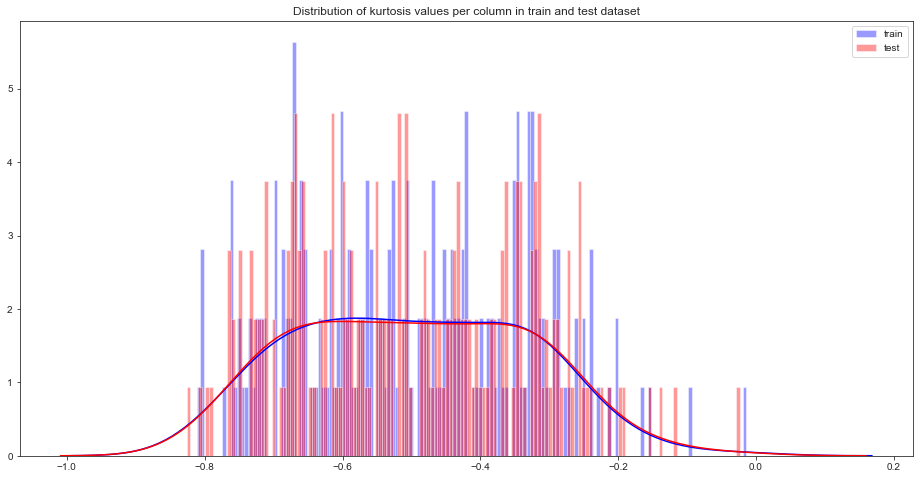

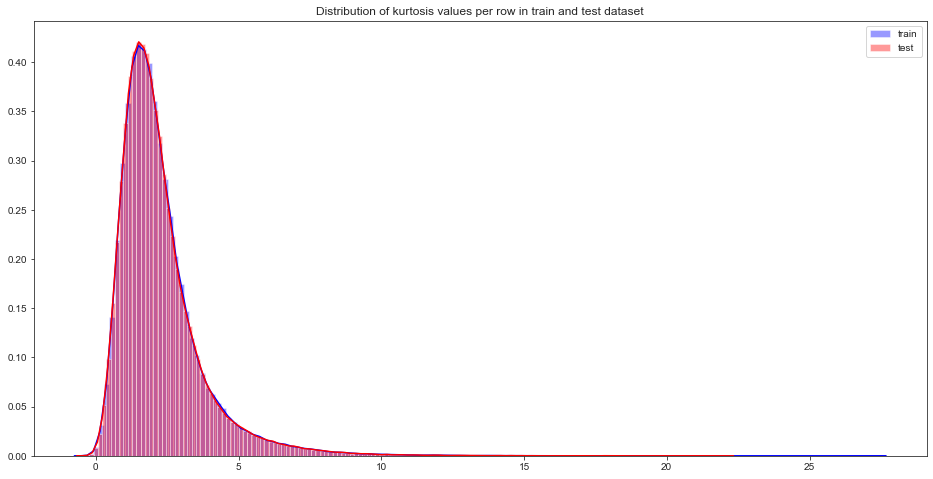

In [17]:
#Distribution of kurtosis values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=df_train.columns.values[2:202]
#test attributes
test_attributes=df_test.columns.values[1:201]
#Distribution plot for kurtosis values per column in train attributes
sns.distplot(df_train[train_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per column in test attributes
sns.distplot(df_test[test_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='test')
plt.title('Distribution of kurtosis values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of kutosis values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for kurtosis values per row in train attributes
sns.distplot(df_train[train_attributes].kurtosis(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per row in test attributes
sns.distplot(df_test[test_attributes].kurtosis(axis=1),color='red',kde=True, bins=150, label='test')
plt.title('Distribution of kurtosis values per row in train and test dataset')
plt.legend()
plt.show()

# Missing Value Analaysis

In [18]:
#Finding the missing values in train and test data
train_missing=df_train.isnull().sum().sum()
test_missing=df_test.isnull().sum().sum()
print('Missing values in train data :',train_missing)
print('Missing values in test data :',test_missing)

Missing values in train data : 0
Missing values in test data : 0


# Correlation in train and test datasets


In [19]:
#Correlations in train attributes
train_attributes=df_train.columns.values[2:202]
correlations_train=df_train[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
correlations_train=correlations_train[correlations_train['level_0']!=correlations_train['level_1']]
print(correlations_train.head(10))
print(correlations_train.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844


In [20]:
#Correlations in test attributes
test_attributes=df_test.columns.values[1:201]
correlations_test=df_test[test_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
correlations_test=correlations_test[correlations_test['level_0']!=correlations_test['level_1']]
print(correlations_test.head(10))
print(correlations_test.tail(10))

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868


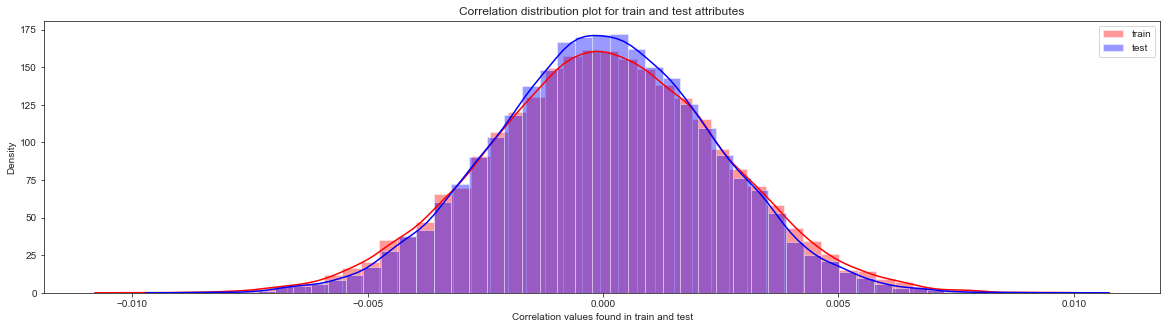

In [21]:
#Correlations in train data
correlations_train=df_train[train_attributes].corr()
correlations_train=correlations_train.values.flatten()
correlations_train=correlations_train[correlations_train!=1]
#Correlations in test data
correlations_test=df_test[test_attributes].corr()
correlations_test=correlations_test.values.flatten()
correlations_test=correlations_test[correlations_test!=1]

plt.figure(figsize=(20,5))
#Distribution plot for correlations in train data
sns.distplot(correlations_train, color="Red", label="train")
#Distribution plot for correlations in test data
sns.distplot(correlations_test, color="Blue", label="test")
plt.xlabel("Correlation values found in train and test")
plt.ylabel("Density")
plt.title("Correlation distribution plot for train and test attributes")
plt.legend()

In [22]:
X=df_train.iloc[:,2:]
X.head()
X.shape

(200000, 200)

In [23]:
y=df_train.iloc[:,1]
y.head()
y.shape

(200000,)

In [24]:
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
#Split the training data
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (150000, 200)
Shape of X_valid : (50000, 200)
Shape of y_train : (150000,)
Shape of y_valid : (50000,)


# Random Forest 

In [25]:
#Random forest classifier
model_rf=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [26]:
#Permutation importance
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(model_rf,random_state=42)
#fitting the model
perm_imp.fit(X_valid,y_valid)

PermutationImportance(estimator=RandomForestClassifier(n_estimators=10,
                                                       random_state=42),
                      random_state=42)

In [27]:
#Important features
eli5.show_weights(perm_imp,feature_names=X_valid.columns.tolist(),top=200)

Weight,Feature
0.0004 ± 0.0002,var_81
0.0003 ± 0.0002,var_146
0.0003 ± 0.0002,var_109
0.0003 ± 0.0002,var_12
0.0002 ± 0.0001,var_110
0.0002 ± 0.0000,var_173
0.0002 ± 0.0001,var_174
0.0002 ± 0.0002,var_0
0.0002 ± 0.0002,var_26
0.0001 ± 0.0001,var_166


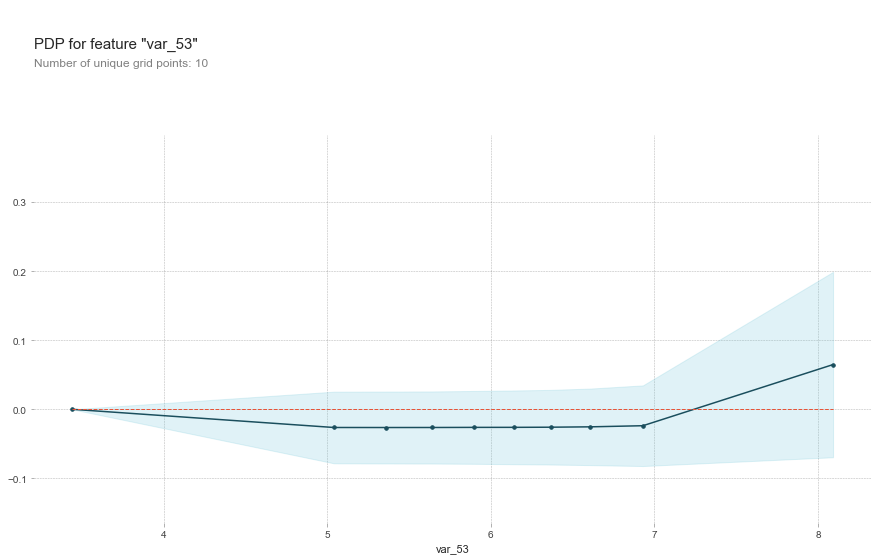

In [31]:
#Create the data we will plot 'var_53'
features=[v for v in X_valid.columns]
pdp_data=pdp.pdp_isolate(model_rf,dataset=X_valid,model_features=features,feature='var_53')
#plot feature "var_53"
pdp.pdp_plot(pdp_data,'var_53')
plt.show()

In [32]:
#StratifiedKFold cross validator
cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index,valid_index in cv.split(X,y):
    X_train, X_valid=X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid=y.iloc[train_index], y.iloc[valid_index]

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (160000, 200)
Shape of X_valid : (40000, 200)
Shape of y_train : (160000,)
Shape of y_valid : (40000,)


# Logistic Regression 

In [33]:
#Logistic regression model
model_lr=LogisticRegression(random_state=42)
#fitting the lr model
model_lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [34]:
#Accuracy of the model
score_lr=model_lr.score(X_train,y_train)
print('Accuracy of the lr_model :',score_lr)

Accuracy of the lr_model : 0.9122


In [35]:
#Cross validation prediction
cv_predict=cross_val_predict(model_lr,X_valid,y_valid,cv=5)
#Cross validation score
cv_score=cross_val_score(model_lr,X_valid,y_valid,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.910425


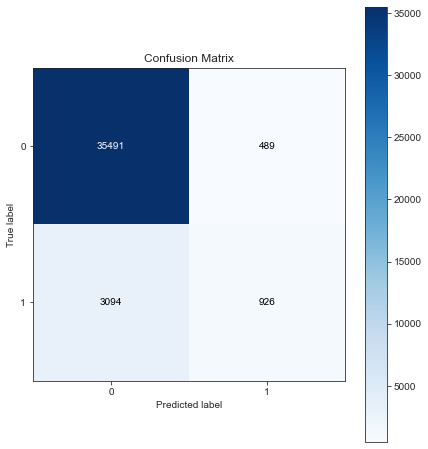

In [39]:
#Confusion matrix
cm=confusion_matrix(y_valid,cv_predict)
#Plot the confusion matrix
plot_confusion_matrix(y_valid,cv_predict,normalize=False,figsize=(7,8))

ROC score : 0.6083786874410604


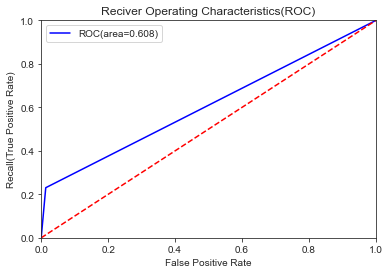

AUC: 0.6083786874410604


In [40]:
#ROC_AUC score
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [41]:
#Classification report
scores=classification_report(y_valid,cv_predict)
print(scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.65      0.23      0.34      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



In [42]:
#Predicting the model
X_test=df_test.drop(['ID_code'],axis=1)
pred_lr=model_lr.predict(X_test)
print(pred_lr)

[0 0 0 ... 0 0 0]


In [49]:
from imblearn.over_sampling import SMOTE
#Synthetic Minority Oversampling Technique
sm = SMOTE(random_state=42)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_valid,y_valid)

In [50]:
#Logistic regression model for SMOTE
smote=LogisticRegression(random_state=42)
#fitting the smote model
smote.fit(X_smote,y_smote)

LogisticRegression(random_state=42)

In [51]:
#Accuracy of the model
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7886806742541098


In [52]:
#Cross validation prediction
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.7964702612562535


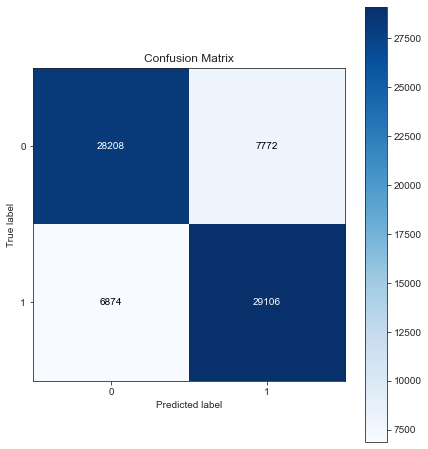

In [53]:
#Confusion matrix
cm=confusion_matrix(y_smote_v,cv_pred)
#Plot the confusion matrix
plot_confusion_matrix(y_smote_v,cv_pred,normalize=False,figsize=(7,8))

ROC score : 0.7964702612562535


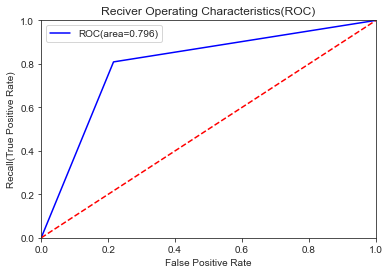

AUC: 0.7964702612562535


In [55]:
#ROC_AUC score
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [56]:
#Classification report
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



In [57]:
#Predicting the model
smote_pred=smote.predict(X_test)
print(smote_pred)

[1 1 0 ... 0 0 1]


# Light GBM Model 

In [58]:
#Training the model
#training data
lgb_train=lgb.Dataset(X_train,label=y_train)
#validation data
lgb_valid=lgb.Dataset(X_valid,label=y_valid)

In [59]:
#Selecting best hyperparameters by tuning of different parameters
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [60]:
num_rounds=10000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],verbose_eval=1000,early_stopping_rounds = 5000)
lgbm

Training until validation scores don't improve for 5000 rounds
[1000]	training's auc: 0.938309	valid_1's auc: 0.887942
[2000]	training's auc: 0.957945	valid_1's auc: 0.892205
[3000]	training's auc: 0.971593	valid_1's auc: 0.893526
[4000]	training's auc: 0.981333	valid_1's auc: 0.894011
[5000]	training's auc: 0.988169	valid_1's auc: 0.893938
[6000]	training's auc: 0.992771	valid_1's auc: 0.893874
[7000]	training's auc: 0.995759	valid_1's auc: 0.893498
[8000]	training's auc: 0.997638	valid_1's auc: 0.893374
Early stopping, best iteration is:
[3804]	training's auc: 0.979706	valid_1's auc: 0.89418


In [61]:
#predict the model
#probability predictions
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)
#Convert to binary output 1 or 0
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

[0.43204216 0.6001353  0.47570884 ... 0.03934805 0.25337599 0.30022367]
[0 1 0 ... 0 0 0]


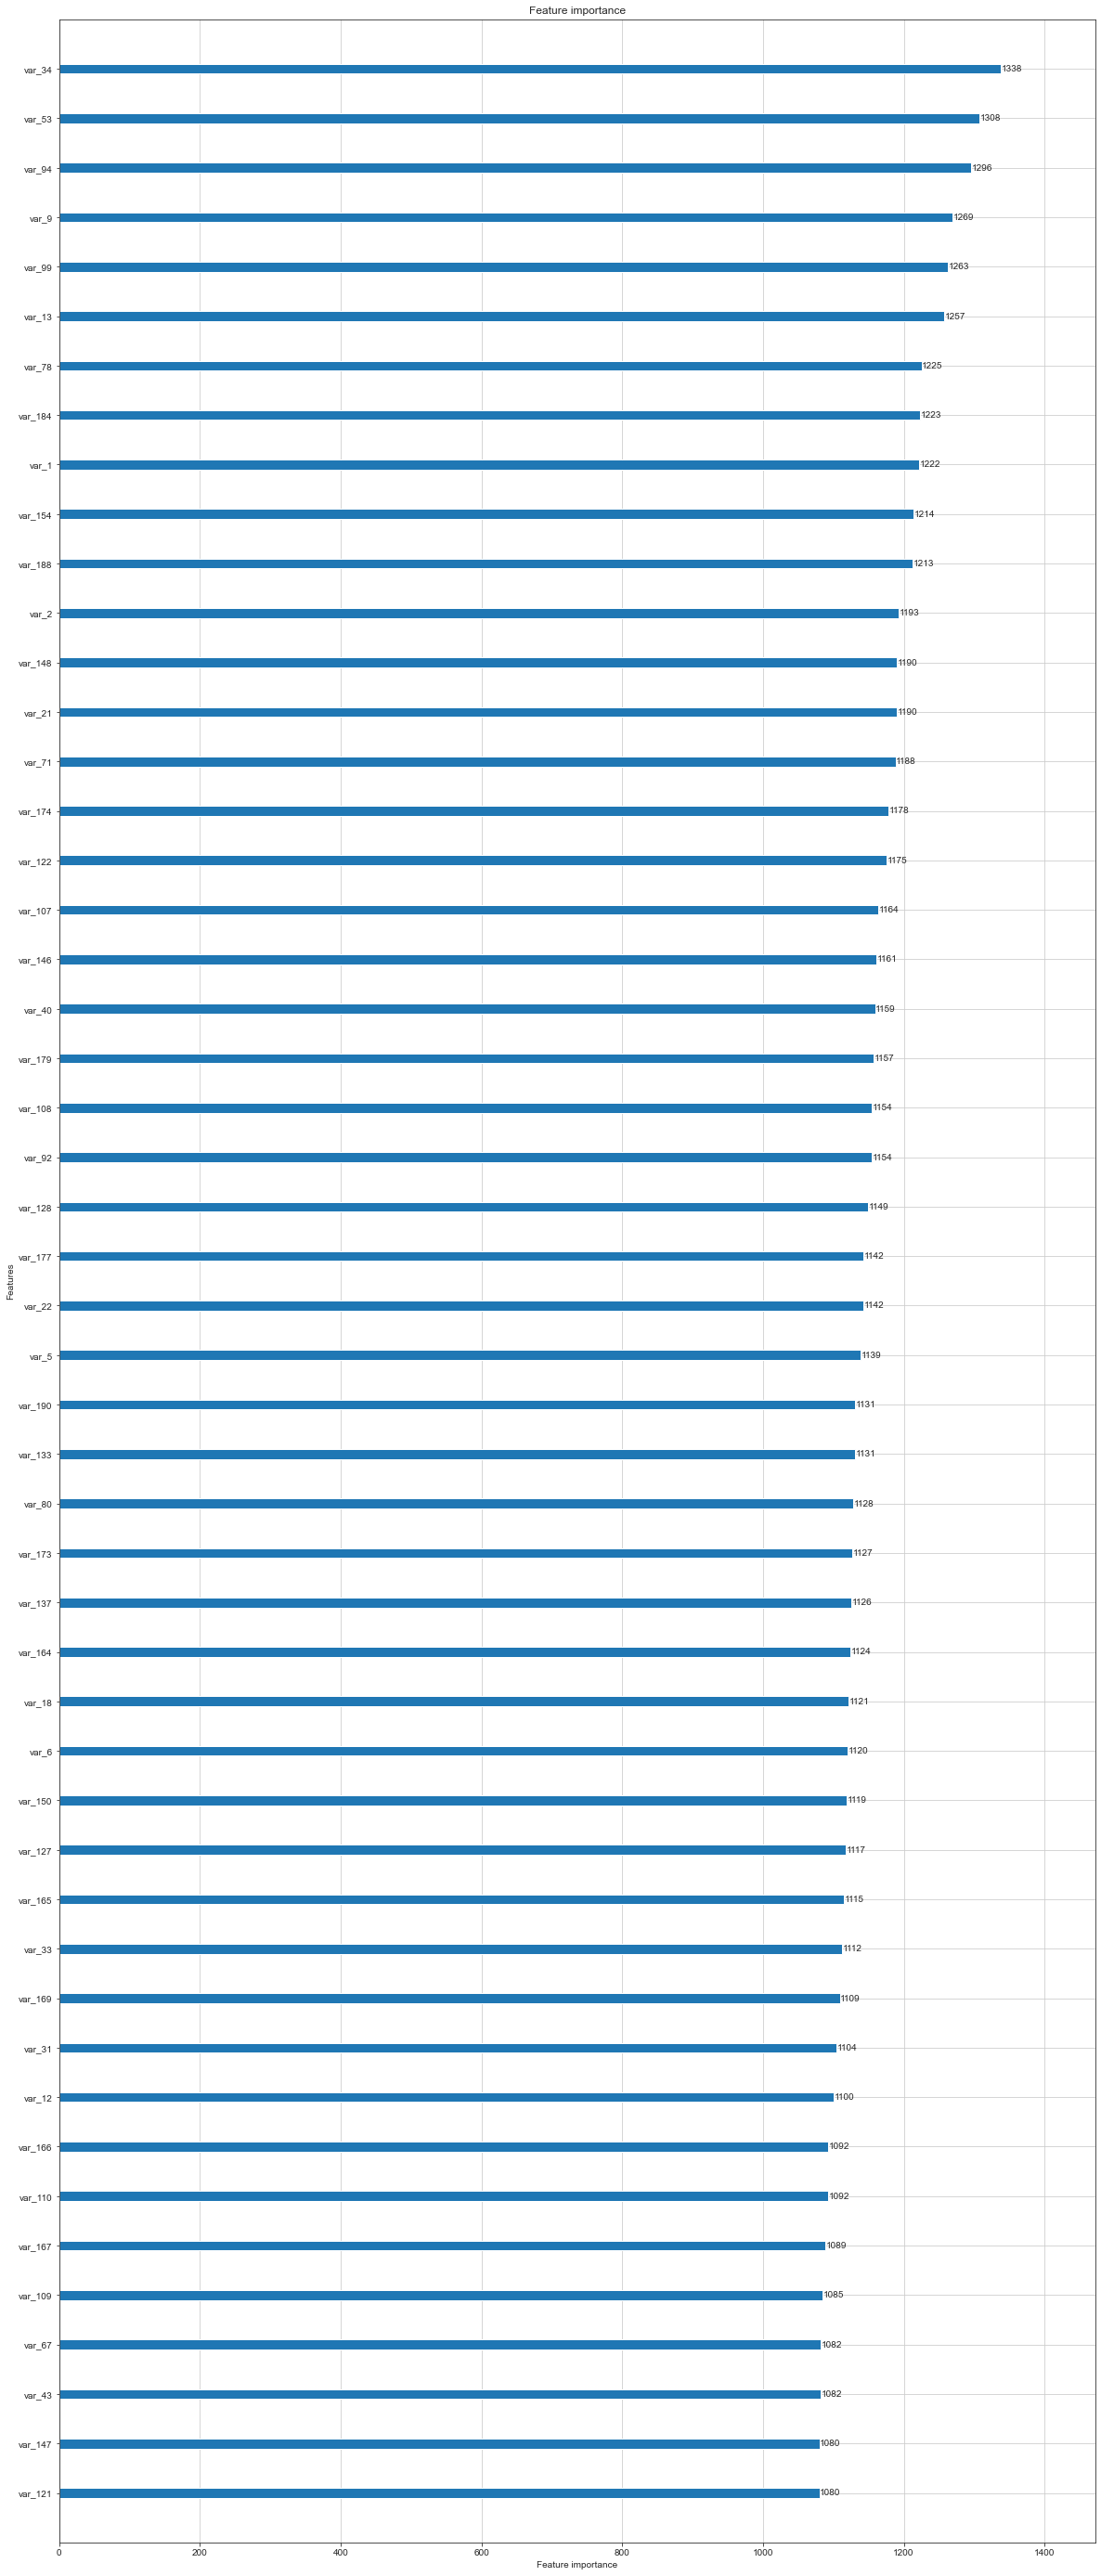

In [62]:
#plot the important features
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

In [63]:
#final prediction 
predict_df=pd.DataFrame({'ID_code':df_test['ID_code'].values})
predict_df['lgbm_predict_prob']=lgbm_predict_prob
predict_df['lgbm_predict']=lgbm_predict
predict_df.to_csv('test_predict.csv',index=False)
predict_df.head()

,ID_code,lgbm_predict_prob,lgbm_predict
0,test_0,0.432042,0
1,test_1,0.600135,1
2,test_2,0.475709,0
3,test_3,0.437665,0
4,test_4,0.228739,0
